In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Flatten, Dense, MaxPooling2D)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid', context = 'talk')

The function sns.set(style='darkgrid', context='talk') is used to set the aesthetic style and the scaling of the plot elements in seaborn1. The style parameter controls things like the color of the axes, whether a grid is enabled by default, and other aesthetic elements. The context parameter controls the size of the labels, lines, and other elements of the plot, making it easy to adapt your figure for different contexts such as a paper, a talk, or a poster1.

The style='darkgrid' means that the background of the plot will be dark and a grid will be drawn to help read the plot. The context='talk' means that the plot elements will be scaled up slightly to make them more visible in a talk setting1. You can also use other values for these parameters, such as style='white' or context='paper', depending on your preference and purpose1.

In [4]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
train_data, valid_data, train_labels, valid_labels = train_test_split(train_data, train_labels, test_size = 10000, random_state = 42)

In [5]:
print(" ----Training data----")
print(f"Data shape: {train_data.shape}")
print(f"Label shape: {train_labels.shape}")
print(f"Unique labels: {np.unique(train_labels)}")

 ----Training data----
Data shape: (50000, 28, 28)
Label shape: (50000,)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


In [6]:
print("----Validation data----")
print(f"Data shape: {valid_data.shape}")
print(f"Label shape: {valid_labels.shape}")
print(f"Unique labels: {np.unique(valid_labels)}")

----Validation data----
Data shape: (10000, 28, 28)
Label shape: (10000,)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


In [7]:
print("----Test data----")
print(f"Data shape: {test_data.shape}")
print(f"Label shape: {test_labels.shape}")
print(f"Unique labels: {np.unique(test_labels)}")

----Test data----
Data shape: (10000, 28, 28)
Label shape: (10000,)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


Checking for skewdness in data

In [8]:
n_classes = len(np.unique(train_labels))
(pd.concat([pd.Series(train_labels).value_counts(normalize= True)
                .sort_index(),
            pd.Series(valid_labels).value_counts(normalize = True)
                .sort_index(),
            pd.Series(test_labels).value_counts(normalize = True)
                .sort_index()],
          keys = ['train', 'valid', 'test'], axis = 1)
   .style.background_gradient('YlGn', axis = 'index').format("{:.2%}"))

,train,valid,test
0,9.88%,9.84%,9.80%
1,11.30%,10.93%,11.35%
2,9.93%,9.94%,10.32%
3,10.26%,10.00%,10.10%
4,9.72%,9.80%,9.82%
5,9.00%,9.19%,8.92%
6,9.87%,9.81%,9.58%
7,10.41%,10.60%,10.28%
8,9.74%,9.79%,9.74%
9,9.88%,10.10%,10.09%


The distribution seems to be fair, there is no skewedness in data

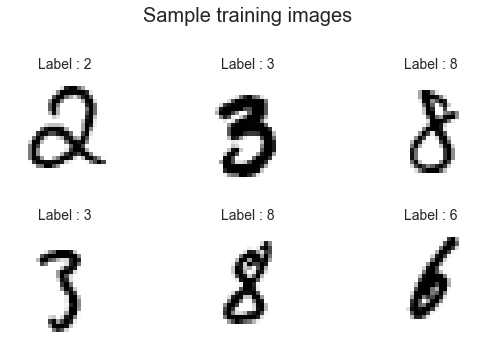

In [9]:
def inspect_sample_images(data, labels, title, n_rows = 2, n_cols = 3, seed = 42):
    np.random.seed(seed)
    indices = np.random.choice(range(len(data)), n_rows* n_cols, replace = False)

    plt.figure(figsize = (8, 5))
    for i, ind in enumerate(indices):
        ax = plt.subplot(n_rows, n_cols, i+1)
        plt.imshow(data[ind], cmap = 'binary')
        plt.axis('off')
        plt.title(f"Label : {labels[ind]}", fontsize = 14)
    plt.suptitle(title, fontsize = 20)
    plt.tight_layout()

inspect_sample_images(train_data, train_labels, 'Sample training images')

This line of code uses NumPy's random.choice() function to randomly select a specified number of indices from a range of integers.

Here's a breakdown of the different parts of this line:

np.random.choice() is a function from the NumPy library that randomly selects elements from a given array or range of numbers.
range(len(data)) creates a range of integers from 0 to the length of the data array.
n_rows*n_cols is the total number of indices to select. This is typically used when creating a grid of subplots, where n_rows and n_cols represent the number of rows and columns in the grid, respectively.
replace=False ensures that the same index is not selected more than once. If replace=True, then the same index can be selected multiple times.
The result of this line of code is an array of n_rows*n_cols randomly selected indices, which can be used to index into the data array to select the corresponding elements. This is often used when creating a grid of subplots and selecting a subset of the data to display in each subplot

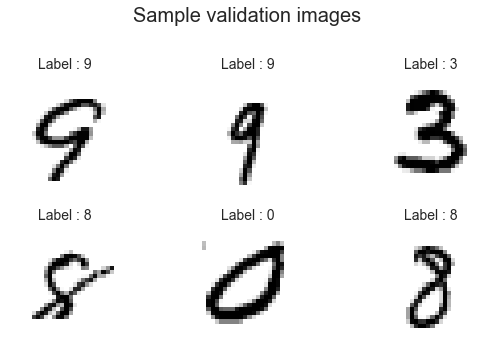

In [10]:
inspect_sample_images(valid_data, valid_labels, 'Sample validation images')

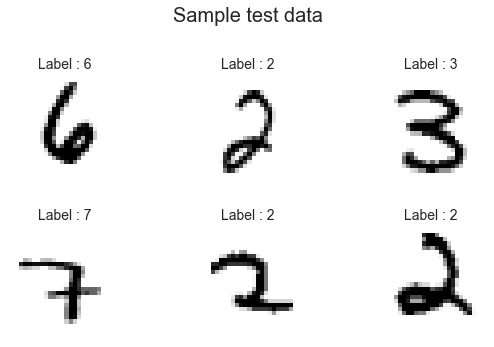

In [11]:
inspect_sample_images(test_data, test_labels, "Sample test data")

Model 0

one-hot encoding our labels.(currently they are in 1D format)

In [12]:
train_labels_ohe = tf.one_hot(train_labels, 10)
valid_labels_ohe = tf.one_hot(valid_labels, 10)
test_labels_ohe = tf.one_hot(test_labels, 10)

tf.random.set_seed(42)
model_0 = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(16, activation = "relu"),
    Dense(16, activation = "relu"),
    Dense(n_classes, activation = "softmax")
])

In [13]:
model_0.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [14]:
hist_0 = model_0.fit(train_data, train_labels_ohe, epochs = 5,
                     validation_data = (valid_data, valid_labels_ohe))

Epoch 1/5
1563/1563 [==============================] - 10s 5ms/step - loss: 2.0148 - accuracy: 0.3885 - val_loss: 1.3282 - val_accuracy: 0.4829
Epoch 2/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1620 - accuracy: 0.5786 - val_loss: 0.8847 - val_accuracy: 0.7119
Epoch 3/5
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7441 - accuracy: 0.7728 - val_loss: 0.6011 - val_accuracy: 0.8345
Epoch 4/5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5195 - accuracy: 0.8556 - val_loss: 0.5091 - val_accuracy: 0.8580
Epoch 5/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4195 - accuracy: 0.8902 - val_loss: 0.3697 - val_accuracy: 0.9043


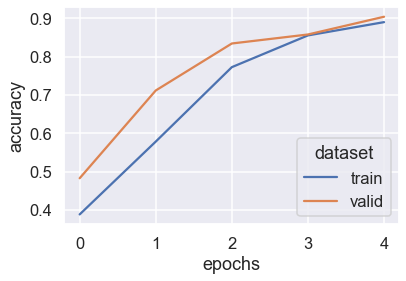

In [32]:
def clean_history(hist):
    epochs = len(hist.history['accuracy'])
    df = pd.DataFrame(
        {
        'epochs': np.tile(np.arange(epochs), 2),
        'accuracy': hist.history['accuracy']+ hist.history['val_accuracy'],
        'loss': hist.history['loss']+ hist.history['val_loss'],
        'dataset': np.repeat(['train', 'valid'], epochs)
        }
    )
    return df
sns.lineplot(data = clean_history(hist_0), x= 'epochs', y ='accuracy', hue= 'dataset');


* <b>len(hist.history['accuracy'])</b> will give no. of epochs<br>
* <b>'history'</b> attribute of keras 'model' object is dictionary that contains information about the training<br> process, including the values of various metrics(such as accuracy and loss) at each epoch. accurycy key will give accuracy values<br>
* <b>tile</b> creates sequence of integers to no. mentioned(here 2)



<kbd>in the code clean_history(hist), the <b>accuracy values of both the training and validation datasets are added together using the + operator. Similarly, the loss values of both datasets are also added together.</b>

This is done in order to create a single column for each metric that contains both the training and validation values for that metric, concatenated together. This allows for easier plotting and analysis of the training process, as the performance of both datasets can be visualized together.

concatenating the values of both datasets together may affect the analysis of the data, especially if the datasets have different sizes or different characteristics. For example, if the training dataset is much larger than the validation dataset, concatenating the two datasets may place more emphasis on the performance of the training dataset. Similarly, if the training dataset is more representative of the data in the real world than the validation dataset, concatenating the two datasets may give a false analysis of the model's performance on unseen data.

Therefore, it's important to carefully consider the characteristics of the datasets before concatenating them together, and to interpret the results of the analysis with caution. It's also important to perform separate analysis on each dataset individually to get a better understanding of the model's performance on each dataset separately.</kbd>

In [38]:
test_preds_0= model_0.predict(test_data)
test_classes_0 = test_preds_0.argmax(axis = 1)
test_metrics = pd.DataFrame(columns = ['Test_accuracy'])
test_metrics.loc['model_0'] = np.mean(test_labels == test_classes_0)
test_metrics

313/313 [==============================] - 1s 3ms/step


,Test_accuracy
model_0,0.9031


In above cell in line 4, we create a boolean array by comparing our predictions(test_classes_0) with true labels(test_labels). Taking mean of this array returns us with the accuracy of our model


In binary classification problems (where there are only two classes), accuracy is usually defined as the number of correctly classified examples (i.e., true positives and true negatives) divided by the total number of examples. However, in multi-class classification problems (where there are more than two classes), accuracy is usually defined as the number of correctly classified examples divided by the total number of examples.

When the code calculates the mean of the boolean array returned by the comparison between "test_labels" and "test_classes_0" using the "np.mean" function, it is essentially computing the proportion of examples that were correctly classified by the model. This is because the boolean array contains "True" values for every test example where the predicted class label matches the true class label, and "False" values for every test example where the predicted class label does not match the true class label.

By taking the mean of this boolean array, we get the fraction of test examples where the predicted class label matches the true class label, which is the same as the proportion of correctly classified examples. Therefore, calculating the mean of the boolean array is a simple way to compute the accuracy of the model on the test set.

In [40]:
def show_confusion_matrix(labels, classes):
    cm = (pd.crosstab(pd.Series(labels, name= 'actual'),
                    pd.Series(classes, name= 'predicted'))
                .style.background_gradient('binary'))
    return cm
show_confusion_matrix(test_labels, test_classes_0)

predicted,0,1,2,3,4,5,6,7,8,9
actual,,,,,,,,,,
0,956,1,8,0,0,5,6,3,1,0
1,0,1101,12,4,0,1,0,2,15,0
2,14,10,956,3,4,3,7,21,14,0
3,4,3,36,871,0,22,0,8,51,15
4,1,0,9,0,870,0,28,8,9,57
5,14,0,5,48,2,749,27,5,30,12
6,28,1,30,0,6,12,877,1,3,0
7,1,2,32,2,6,1,0,952,10,22
8,8,5,34,15,7,30,20,14,837,4
